In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/graduate_admissions/Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})
data = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Admit_Probability']]

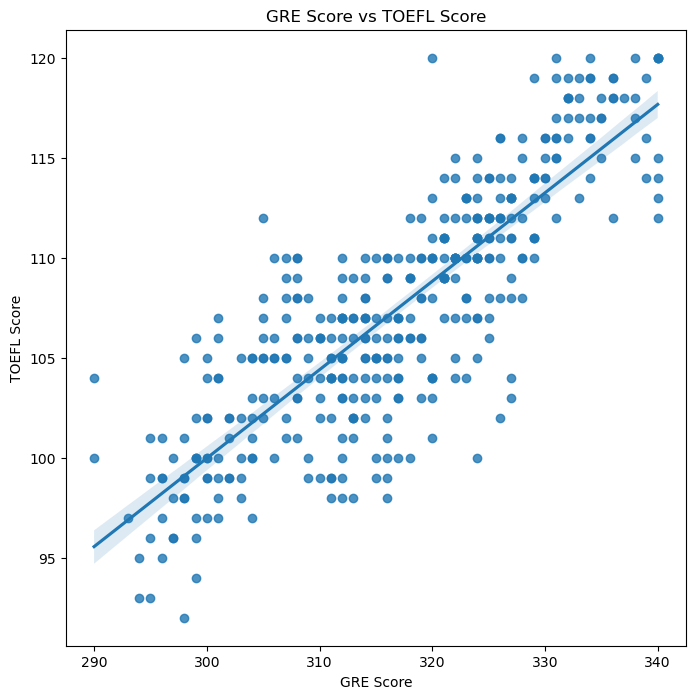

In [9]:
plt.figure(figsize=(8, 8))
fig = sns.regplot(data=data, x='GRE Score', y='TOEFL Score')
plt.title('GRE Score vs TOEFL Score')
plt.show()

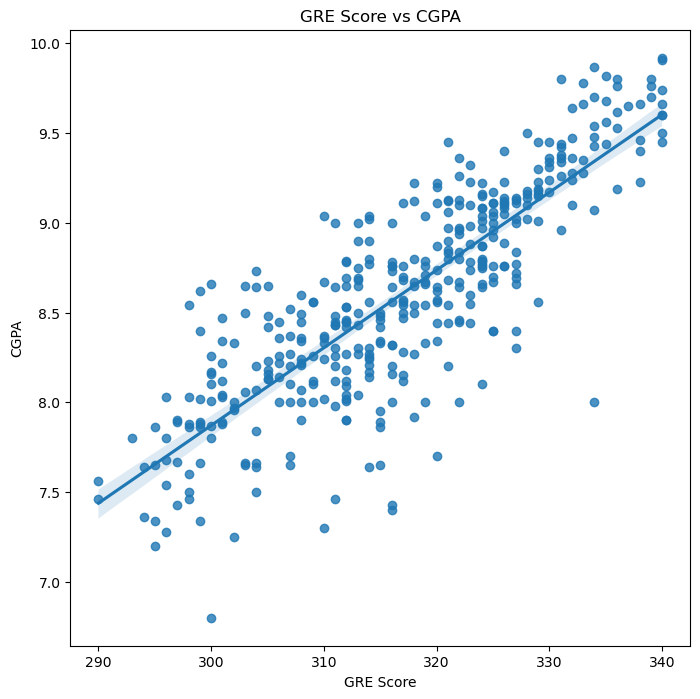

In [10]:
plt.figure(figsize=(8, 8))
fig = sns.regplot(data=data, x='GRE Score', y='CGPA')
plt.title('GRE Score vs CGPA')
plt.show()

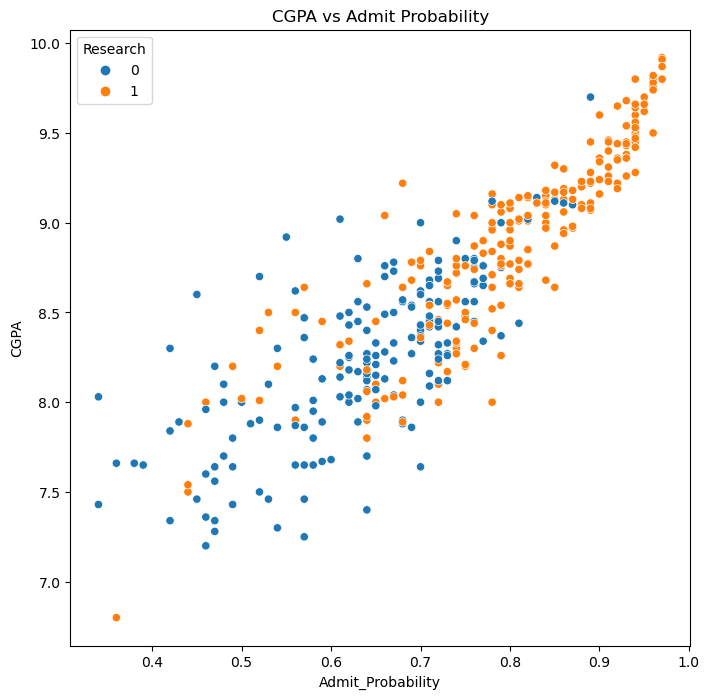

In [11]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=data, x='Admit_Probability', y='CGPA', hue='Research')
plt.title('CGPA vs Admit Probability')
plt.xlabel('Admit_Probability')
plt.ylabel('CGPA')
plt.show()

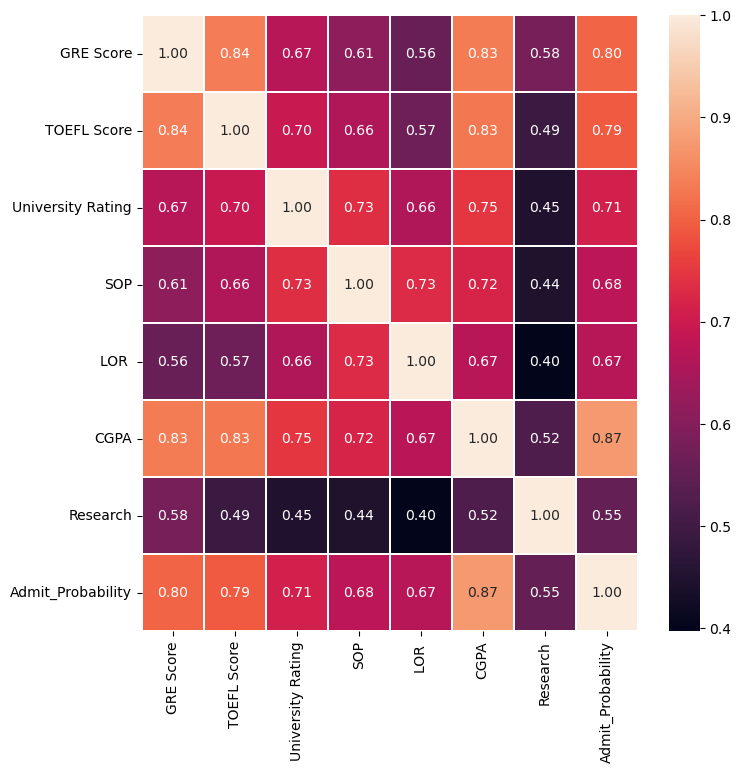

In [12]:
plt.figure(figsize=(8, 8))
fig = sns.heatmap(data=data.corr(), annot=True, linewidths=0.05, fmt='.2f')
plt.show()

In [13]:
from sklearn import preprocessing

In [14]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admit_Probability'],
      dtype='object')

In [15]:
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = preprocessing.scale(data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

In [16]:
data.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
126,0.540391,0.922150,3,0.596653,-0.504260,1.210728,1,0.85
88,-0.244998,0.097329,3,1.093864,0.052933,-0.770563,0,0.64
97,1.238514,2.076899,3,0.596653,0.610127,0.606267,1,0.86
175,0.278595,0.592221,4,1.093864,0.052933,0.455151,1,0.85
264,0.714922,0.427257,2,-0.397769,-1.061454,0.270455,1,0.75
379,-0.506794,-1.387349,1,-0.894980,-0.504260,-0.283635,1,0.71
27,-1.641244,-1.552313,2,-1.889402,-1.061454,-1.845161,1,0.44
281,0.016799,0.427257,3,0.596653,1.167321,0.858126,1,0.80
242,0.627656,1.252078,3,0.099442,-0.504260,0.270455,1,0.70
368,-1.641244,-2.542098,1,-1.392191,-1.618648,-1.207118,0,0.51


In [17]:
col = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
features = data[col]

In [18]:
target = data[['Admit_Probability']]

In [19]:
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [39]:
y = target.copy()

In [40]:
y[y['Admit_Probability']>=0.8] = 2
y[(y['Admit_Probability']>=0.6) & (y['Admit_Probability']<0.8)] = 1
y[y['Admit_Probability']<0.6] = 0

In [46]:
y.groupby('Admit_Probability')['Admit_Probability'].count()

Admit_Probability
0.0     73
1.0    199
2.0    128
Name: Admit_Probability, dtype: int64

In [47]:
target = y

In [48]:
target['Admit_Probability'].unique()

array([2., 1., 0.])

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [51]:
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(X_test.values).float()

In [52]:
Xtrain.shape

torch.Size([320, 5])

In [56]:
y_train.shape

(320, 1)

In [54]:
ytrain = torch.from_numpy(y_train.values).view(1, -1)[0].long()
ytest = torch.from_numpy(y_test.values).view(1, -1)[0].long()

In [55]:
ytrain.shape

torch.Size([320])

In [57]:
import torch.nn as nn
import torch.nn.functional as F

In [58]:
input_size = Xtrain.shape[1]
output_size = len(target['Admit_Probability'].unique())

In [68]:
class Net(nn.Module):
    def __init__(self, hidden_size, activation_fn='relu', apply_dropout=False):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

        self.hidden_size = hidden_size
        self.activation_fn = activation_fn

        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        activation_fn = None
        if self.activation_fn == 'sigmoid':
            activation_fn = F.torch.sigmoid
        elif self.activation_fn == 'relu':
            activation_fn = F.torch.relu
        if self.activation_fn == 'tanh':
            activation_fn = F.torch.tanh
        
        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))
        if self.dropout != None:
            x = self.dropout(x)
        x = self.fc3(x)

        return F.log_softmax(x, dim=-1)

In [60]:
import torch.optim as optim

In [74]:
def train_and_evaluate_model(model, lr=0.001):
    epoch_data = []
    epochs = 1001

    optimizer = optim.Adam(model.parameters(), lr=lr)

    loss_fn = nn.NLLLoss()

    test_accuracy = 0.0

    for epoch in range(1, epochs):
        optimizer.zero_grad()
        model.train()
        ypred = model(Xtrain)
        loss = loss_fn(ypred, ytrain)
        loss.backward()
        optimizer.step()

        model.eval()
        ypred_test = model(Xtest)
        loss_test = loss_fn(ypred_test, ytest)
        _, pred = ypred_test.data.max(1)
        test_accuracy = pred.eq(ytest.data).sum().item() / y_test.values.size
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])
        if epoch % 100 == 0:
            print(f'epoch = {epoch} | train loss = {loss.data.item():.2f} | test loss = {loss_test.data.item():.2f} | test acc = {test_accuracy:.2f}')
        
    return {
        'model': model,
        'epoch_data': epoch_data,
        'num_epochs': epochs,
        'optimizer': optimizer,
        'loss_fn': loss_fn,
        'test_accuracy': test_accuracy,
        'pred': ypred_test.data.max(1),
        'ytest': ytest
    }

In [75]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)
net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [76]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch = 100 | train loss = 1.08 | test loss = 1.11 | test acc = 0.50
epoch = 200 | train loss = 1.04 | test loss = 1.04 | test acc = 0.50
epoch = 300 | train loss = 1.01 | test loss = 1.00 | test acc = 0.50
epoch = 400 | train loss = 0.99 | test loss = 0.96 | test acc = 0.50
epoch = 500 | train loss = 0.95 | test loss = 0.91 | test acc = 0.50
epoch = 600 | train loss = 0.90 | test loss = 0.86 | test acc = 0.74
epoch = 700 | train loss = 0.85 | test loss = 0.80 | test acc = 0.72
epoch = 800 | train loss = 0.80 | test loss = 0.74 | test acc = 0.79
epoch = 900 | train loss = 0.75 | test loss = 0.70 | test acc = 0.79
epoch = 1000 | train loss = 0.72 | test loss = 0.67 | test acc = 0.79


In [77]:
net = Net(hidden_size=50, activation_fn='tanh', apply_dropout=True)
net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [78]:
result_50_tanh = train_and_evaluate_model(net)

epoch = 100 | train loss = 0.48 | test loss = 0.40 | test acc = 0.84
epoch = 200 | train loss = 0.45 | test loss = 0.39 | test acc = 0.84
epoch = 300 | train loss = 0.44 | test loss = 0.40 | test acc = 0.85
epoch = 400 | train loss = 0.42 | test loss = 0.41 | test acc = 0.85
epoch = 500 | train loss = 0.41 | test loss = 0.41 | test acc = 0.84
epoch = 600 | train loss = 0.41 | test loss = 0.41 | test acc = 0.84
epoch = 700 | train loss = 0.39 | test loss = 0.41 | test acc = 0.84
epoch = 800 | train loss = 0.38 | test loss = 0.41 | test acc = 0.85
epoch = 900 | train loss = 0.38 | test loss = 0.41 | test acc = 0.86
epoch = 1000 | train loss = 0.36 | test loss = 0.41 | test acc = 0.88


In [79]:
result_model = result_50_tanh

In [81]:
df_epochs_data = pd.DataFrame(
    result_model['epoch_data'],
    columns=['epoch', 'train_loss', 'test_loss', 'accuracy']
)

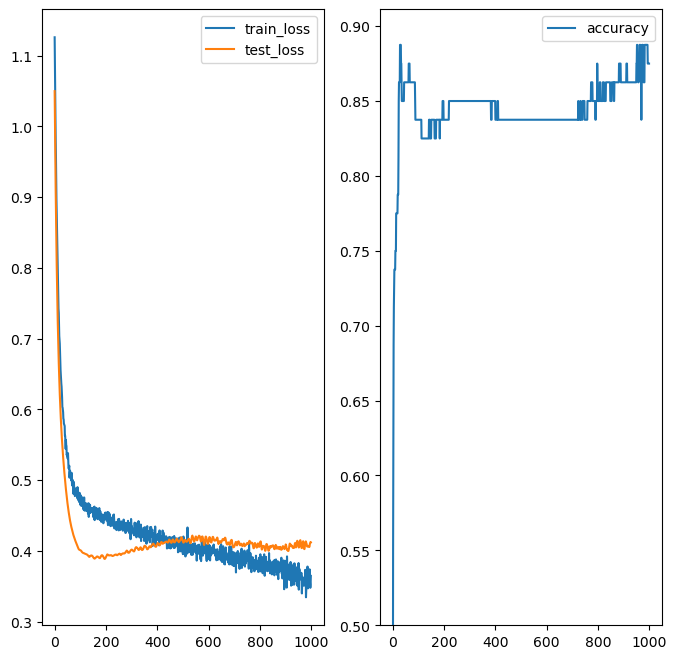

In [82]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
df_epochs_data[['train_loss', 'test_loss']].plot(ax=ax1)
df_epochs_data[['accuracy']].plot(ax=ax2)
plt.ylim(bottom=0.5)
plt.show()